In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5573, 2)

# 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'Message':'Email'},inplace=True)
df.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Category'] = encoder.fit_transform(df['Category'])

In [9]:
df.head()

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

415

In [11]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df = df[df['Category']!=2]

In [13]:
df.shape

(5157, 2)

# 2. EDA

In [14]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

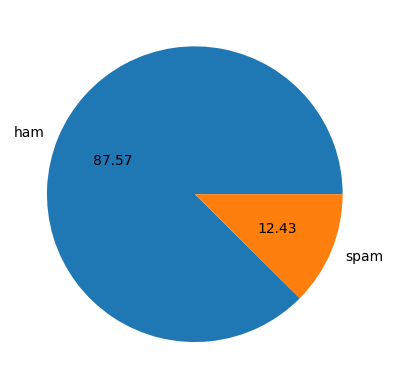

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
df['num_characters'] = df['Email'].apply(len)

In [28]:
# num of words
df['num_words'] = df['Email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df['num_sentences'] = df['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Email,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_characters', ylabel='Count'>

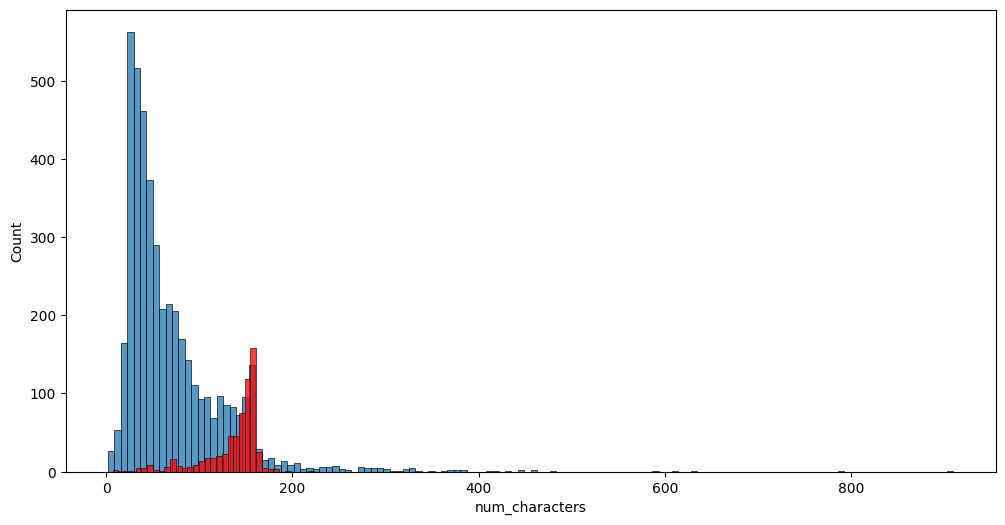

In [35]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

<Axes: >

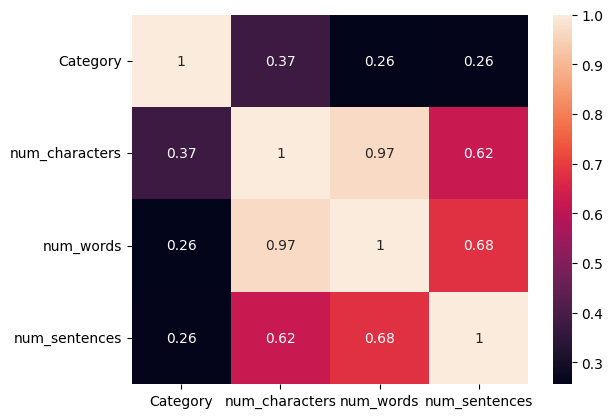

In [37]:
sns.heatmap(df[['Category','num_characters','num_words','num_sentences']].corr(),annot=True)

# 3. Data Preprocessing

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('reading')

'read'

In [48]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [49]:
transform_text('I am sanjib shah. I am enrolled in BEIT course and currently in 6 semester of my bachelor degree')

'sanjib shah enrol beit cours current 6 semest bachelor degre'

In [50]:
df['transformed_text'] = df['Email'].apply(transform_text)

In [51]:
df.head()

,Category,Email,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
from wordcloud import WordCloud
wc = WordCloud(width=400,height=400,min_font_size=12,background_color='white')

In [64]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))


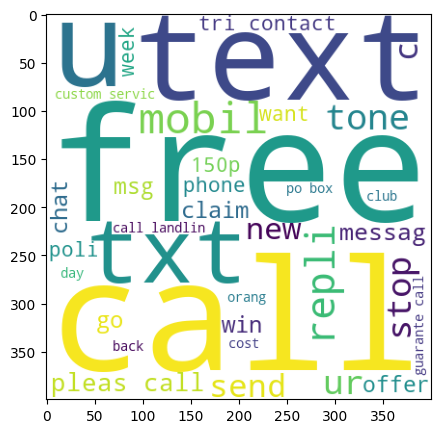

In [65]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

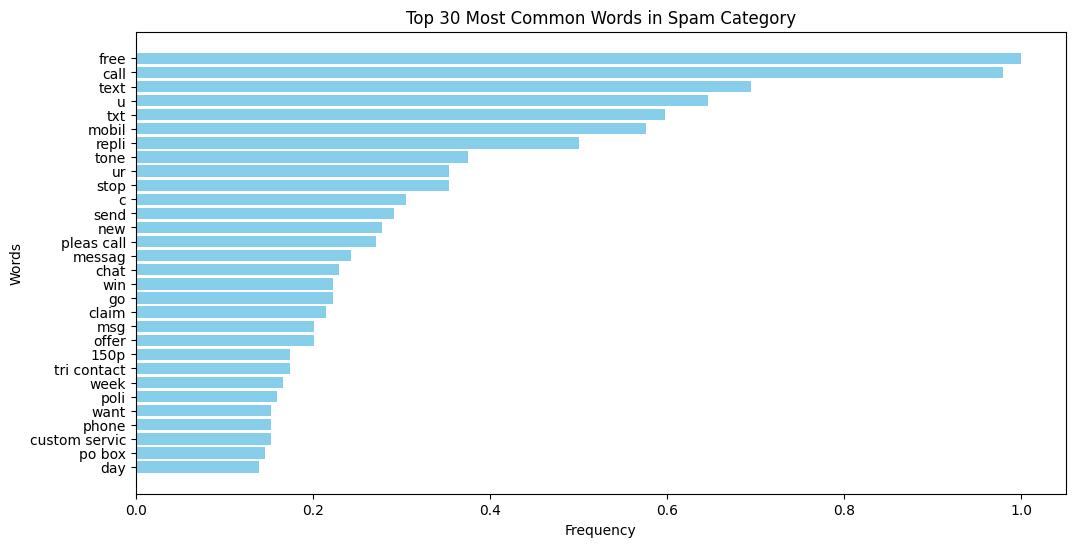

In [66]:
# Get the frequency of words from the word cloud
word_frequencies = spam_wc.words_

# Sort the words by frequency and get the top 30
top_30_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:30]

# Separate the words and their frequencies
words, frequencies = zip(*top_30_words)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Common Words in Spam Category')
plt.gca().invert_yaxis() 
plt.show()

# 4. Model training

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3500)

In [100]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [101]:
X.shape

(5157, 3500)

In [133]:
y = df['Category'].values

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [120]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [121]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


0.9699612403100775
1.0


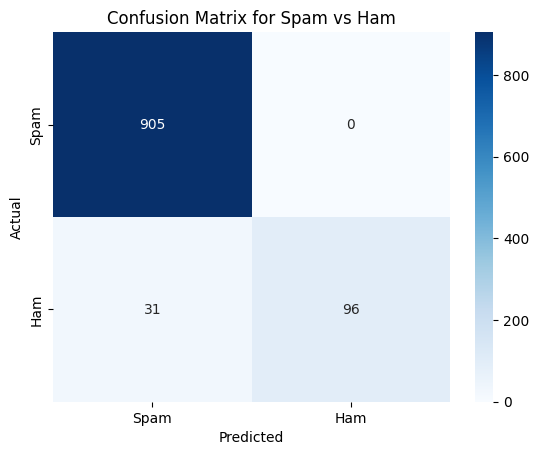

In [136]:
# Fit the model
mnb.fit(X_train, y_train)

# Make predictions
y_pred2 = mnb.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, y_pred2))

# Print precision score
print(precision_score(y_test, y_pred2))

# Display confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix for Spam vs Ham')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9786821705426356
[[904   1]
 [ 21 106]]
0.9906542056074766


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [110]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [111]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [112]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [113]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9767441860465116
Precision -  0.9904761904761905
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9699612403100775
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8144329896907216
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9900990099009901


C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680232558139535
Precision -  0.9433962264150944
For  BgC
Accuracy -  0.9602713178294574
Precision -  0.8981481481481481
For  ETC
Accuracy -  0.9757751937984496
Precision -  0.9903846153846154
For  GBDT
Accuracy -  0.9515503875968992
Precision -  0.963855421686747
For  xgb
Accuracy -  0.9777131782945736
Precision -  0.9814814814814815


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.969961,1.000000
0,SVC,0.976744,0.990476
8,ETC,0.975775,0.990385
5,RF,0.972868,0.990099
10,xgb,0.977713,0.981481
9,GBDT,0.951550,0.963855
6,AdaBoost,0.968023,0.943396
4,LR,0.958333,0.937500
7,BgC,0.960271,0.898148


In [117]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [128]:
df[df['Category']==1].value_counts().sum()

641